
### Create a simple neural network to classify the Iris dataset

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
# Load the dataset
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
# Convert species to numerical values
iris_data['Species'] = iris_data['Species'].astype('category').cat.codes

# Split the data into features and labels
X = iris_data.drop('Species', axis=1).values
y = iris_data['Species'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Build the model using an Input layer
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer specifying the shape
    layers.Dense(10, activation='relu'),  # Hidden layer with 10 neurons
    layers.Dense(3, activation='softmax')  # Output layer with 3 neurons (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.2565 - loss: 1.1338 - val_accuracy: 0.1250 - val_loss: 1.1394
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2708 - loss: 1.1199 - val_accuracy: 0.1250 - val_loss: 1.1161
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3464 - loss: 1.0824 - val_accuracy: 0.1250 - val_loss: 1.0938
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3164 - loss: 1.0812 - val_accuracy: 0.1667 - val_loss: 1.0722
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3320 - loss: 1.0346 - val_accuracy: 0.2083 - val_loss: 1.0507
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3112 - loss: 1.0408 - val_accuracy: 0.2083 - val_loss: 1.0299
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3385 - loss: 1.0172 - val_accuracy: 0.2917 - val_loss: 1.0100
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3138 - loss: 1.0024 - val_accuracy: 0.2917 - val_loss

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.1988
Test Accuracy: 1.0000


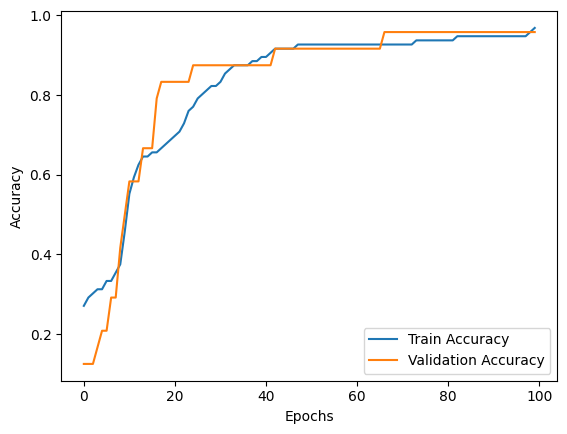

In [19]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
